In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import wrangle

In [2]:
df = pd.read_csv("zillow.csv")

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (37,38,63,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711855,1087254,...,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10711877,1072280,...,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10711888,1340933,...,6.037113e+13,0.077174,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711910,1878109,...,6.037113e+13,-0.041238,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711923,2190858,...,6.037113e+13,-0.009496,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72235 entries, 0 to 72234
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    72235 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         72235 non-null  float64
 4   heatingorsystemtypeid         46694 non-null  float64
 5   buildingclasstypeid           0 non-null      float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         23078 non-null  float64
 8   parcelid                      72235 non-null  int64  
 9   id                            72235 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   72235 non-null  float64
 12  bedroomcnt                    72235 non-null  float64
 13  b

In [5]:
df.describe()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror,buildingclassdesc
count,72235.000000,222.000000,50.0,72235.000000,46694.000000,0.0,206.000000,23078.000000,7.223500e+04,7.223500e+04,...,172.0,7.214100e+04,7.223400e+04,72235.0,7.223300e+04,72230.000000,2618.000000,7.200300e+04,72235.000000,0.0
mean,36117.000000,6.040541,7.0,262.359036,3.951857,NaN,7.388350,1.867233,1.305911e+07,1.495699e+06,...,1.0,1.886558e+05,4.904690e+05,2016.0,3.020603e+05,5978.699293,14.110772,6.050365e+13,0.017019,NaN
std,20852.592685,0.557285,0.0,2.219568,3.656930,NaN,2.734542,3.062289,3.394576e+06,8.604267e+05,...,0.0,2.344585e+05,6.661392e+05,0.0,5.016596e+05,7772.988137,2.222086,1.588501e+12,0.169277,NaN
min,0.000000,4.000000,7.0,260.000000,1.000000,NaN,2.000000,1.000000,1.071186e+07,3.490000e+02,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,4.000000,6.037101e+13,-4.655420,NaN
25%,18058.500000,6.000000,7.0,261.000000,2.000000,NaN,7.000000,1.000000,1.153988e+07,7.543430e+05,...,1.0,8.326400e+04,2.040000e+05,2016.0,8.342300e+04,2677.562500,14.000000,6.037400e+13,-0.023658,NaN
50%,36117.000000,6.000000,7.0,261.000000,2.000000,NaN,7.000000,1.000000,1.258470e+07,1.499765e+06,...,1.0,1.348560e+05,3.560000e+05,2016.0,2.031000e+05,4399.795000,15.000000,6.037621e+13,0.006670,NaN
75%,54175.500000,6.000000,7.0,266.000000,7.000000,NaN,7.000000,1.000000,1.426851e+07,2.239788e+06,...,1.0,2.164510e+05,5.669270e+05,2016.0,3.675360e+05,6852.270000,15.000000,6.059052e+13,0.038563,NaN
max,72234.000000,13.000000,7.0,266.000000,24.000000,NaN,21.000000,13.000000,1.676885e+08,2.982274e+06,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999,NaN


In [6]:
df.value_counts()

Series([], dtype: int64)

In [7]:
# assuming null value for pool means no pool
df.poolcnt.fillna(0, inplace = True)
# assuming null calie for fireplace means no null
df.fireplacecnt.fillna(0, inplace = True)

In [8]:
# drop features/rows with more than 50% null values
df = wrangle.drop_50_pct_null(df)

In [9]:
# create dummy variables and add them to the df
dummy_df =  pd.get_dummies(df['fips'])
dummy_df.columns = ['in_los_angeles', 'in_orange_county', 'in_ventura']
df = pd.concat([df, dummy_df], axis=1)
df['fips'] = df.fips.replace('6,037.00', 6037)
df['fips'] = df.fips.replace('6,059.00', 6059)
df['fips'] = df.fips.replace('6,111.00', 6111)

In [10]:
#create new feature house_age
today = pd.to_datetime('today')
df['house_age'] = today.year - df['yearbuilt']
df['tax_rate'] = df.taxvaluedollarcnt / df.taxamount

df['acres'] = df.lotsizesquarefeet/43560

In [11]:
df['level_of_log_error'] = pd.cut(df.logerror, 
                            bins = [-5,-1,-.15,.15,1,5],
                            labels = ['Way Under', 'Under', 'Accurate', 'Over', 'Way Over'])

In [12]:
#drop features
df = df.drop(['propertycountylandusecode', 'propertyzoningdesc', 
             'heatingorsystemdesc', 'transactiondate',
              'finishedsquarefeet12', 'id', 'censustractandblock',
             'rawcensustractandblock', 'calculatedbathnbr', 
             'assessmentyear', 'propertylandusedesc'], axis=1)

In [13]:
#rename features
df = df.rename(columns={'heatingorsystemtypeid':'has_heating_system', 
                       'bathroomcnt':'bathrooms', 'bedroomcnt':'bedrooms', 
                       'buildingqualitytypeid':'quality',
                       'calculatedfinishedsquarefeet':'square_feet', 
                       'fullbathcnt':'full_bathrooms',
                       'lotsizesquarefeet':'lot_square_feet', 
                       'propertylandusetypeid':'land_type',
                       'regionidcity':'city', 'regionidcounty':'county',
                       'regionidzip':'zip_code', 'roomcnt':'room_count',
                       'structuretaxvaluedollarcnt':'structure_tax_value',
                       'taxvaluedollarcnt':'tax_value', 
                       'landtaxvaluedollarcnt':'land_tax_value', 
                       'fireplacecnt':'has_fireplace',
                       'poolcnt':'has_pool'})

In [14]:
# assuming that null means no heating bc it is southern CA
df.has_heating_system.fillna('13', inplace = True)
# change has_heating_system to binary
df['has_heating_system'] = df.has_heating_system.replace([2.0, 7.0, 24.0, 6.0, 20.0, 13.0, 18.0, 1.0, 10.0, 11.0], 1)
df['has_heating_system'] = df.has_heating_system.replace('13', '0')
df['has_heating_system'] = (df['has_heating_system'] == True ).astype(int)
# all of these are 1 unit counts
df.unitcnt.fillna(1, inplace = True)
df['unitcnt'] = df.unitcnt.replace([2.0, 3.0, 4.0, 6.0], 1)
# change has_fireplace to a binary
df['has_fireplace'] = df.has_fireplace.replace([2.0, 3.0, 4.0, 5.0], 1)
df['has_fireplace'] = df.has_fireplace.replace(0.0, 0)
#fix has_pool to int
df['has_pool'] = df.has_fireplace.replace(1.0, 1)
df['has_pool'] = df.has_fireplace.replace(0.0, 0)
# fix unitcnt to int
df['unitcnt'] = (df['unitcnt'] == True ).astype(int)

In [15]:
# replacing null in quality feature with its median range (6)
df.quality.fillna(6.0, inplace = True)
# replacing null in square_feet with its median
df.lot_square_feet.fillna(7313, inplace = True)
 # replacing null in quality feature with its median
df.square_feet.fillna(1511, inplace = True)
 # replacing null in quality feature with its median
df.full_bathrooms.fillna(2, inplace = True)
 # replacing null in quality feature with its median
df.yearbuilt.fillna(1970, inplace = True)
 # replacing null in quality feature with its median
df.structure_tax_value.fillna(134871, inplace = True)
 # replacing null in quality feature with its median
df.house_age.fillna(51, inplace = True)
 # replacing null in quality feature with its median
df.city.fillna(25218, inplace = True)
 # replacing null in quality feature with its median
df.zip_code.fillna(96410, inplace = True)

In [16]:
#drop remaining null values
df = df.dropna()

In [17]:
# change la, oc, and vent into int
df['in_los_angeles'] = (df['in_los_angeles'] == True ).astype(int)
df['in_orange_county'] = (df['in_orange_county'] == True ).astype(int)
df['in_ventura'] = (df['in_ventura'] == True ).astype(int)

In [18]:
# set index as parcelid
df = df.set_index('parcelid')

In [19]:
# finish dropping
df = df.drop(['Unnamed: 0', 'yearbuilt'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64067 entries, 10711855 to 162960814
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   land_type            64067 non-null  float64 
 1   has_heating_system   64067 non-null  int64   
 2   bathrooms            64067 non-null  float64 
 3   bedrooms             64067 non-null  float64 
 4   quality              64067 non-null  float64 
 5   square_feet          64067 non-null  float64 
 6   fips                 64067 non-null  float64 
 7   has_fireplace        64067 non-null  float64 
 8   full_bathrooms       64067 non-null  float64 
 9   latitude             64067 non-null  float64 
 10  longitude            64067 non-null  float64 
 11  lot_square_feet      64067 non-null  float64 
 12  has_pool             64067 non-null  float64 
 13  city                 64067 non-null  float64 
 14  county               64067 non-null  float64 
 15  zip_code

In [21]:
df.shape

(64067, 30)

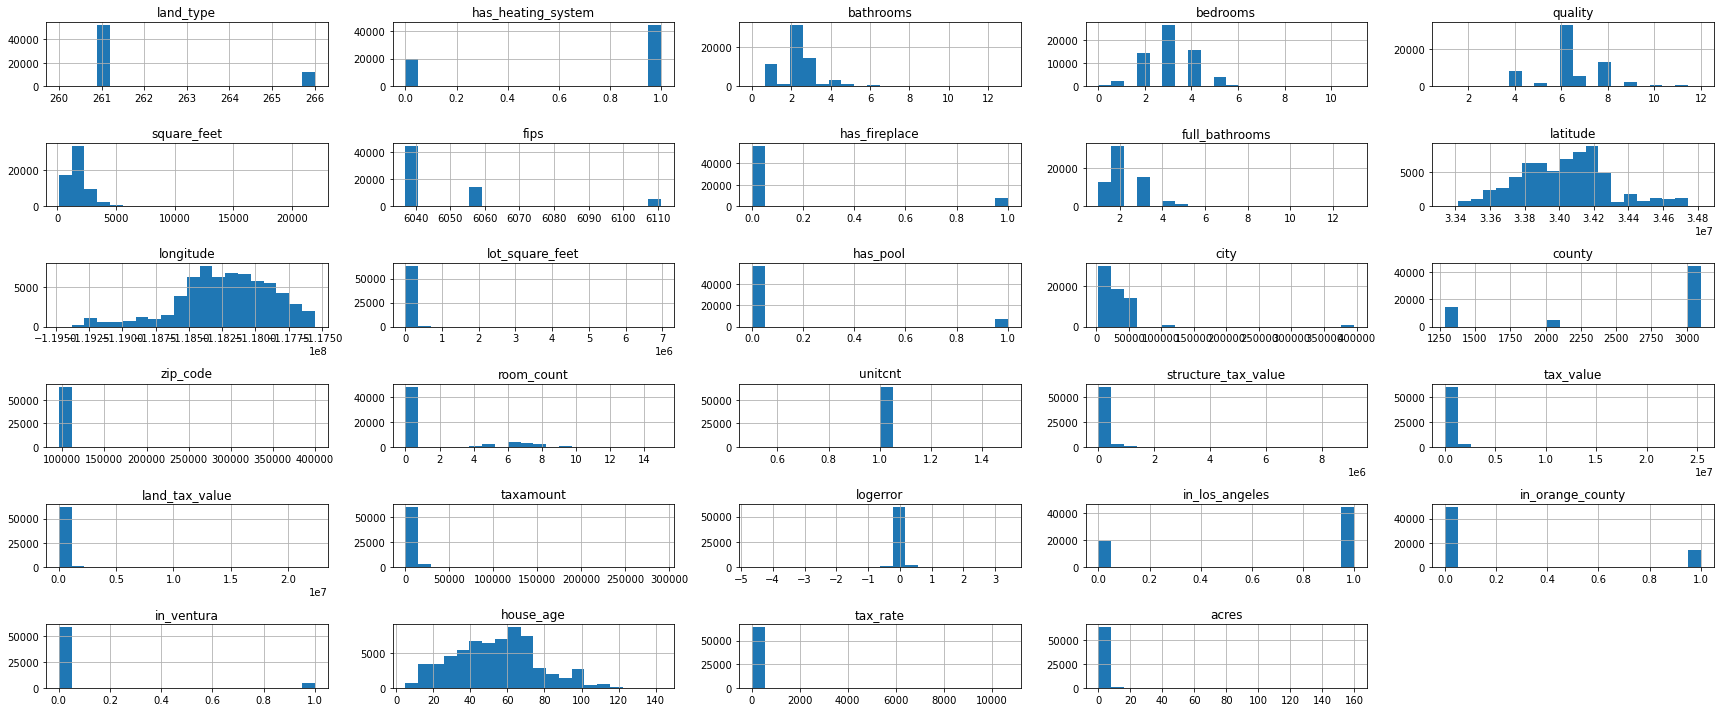

In [22]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

- Take care of outliers for:
    - square feet
    - tax rate


## Take care of Tax Value Outliers

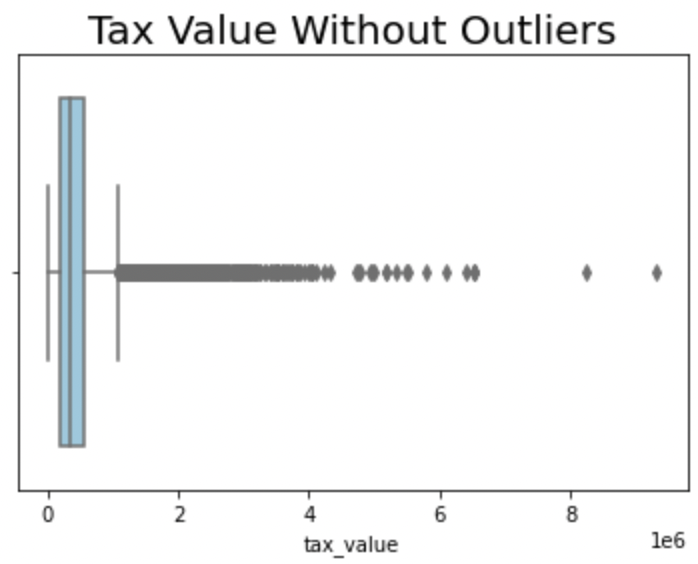

In [23]:
# Let's use IQR for the entire dataset
q1 = df.tax_value.quantile(.25)
q3 = df.tax_value.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

q1 = : 197332.5
q3 = : 579707.0
IQR = : 382374.5
-------------------------------------
Upper Bound = : 1726830.5
Lower Bound = : -949791.0


In [24]:
# lets give us everyhting less than the upper bound
df = df[df.tax_value < upper_bound]
# since lower bound is negative there is no need to include it
# now the shape
df.shape
# went from 64,068 rows to 62,132

(62132, 30)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Tax Value Without Outliers'}, xlabel='tax_value'>

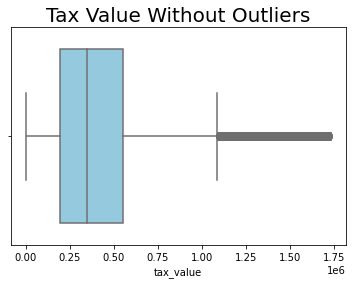

In [25]:
plt.title("Tax Value Without Outliers", size=20, color='black')
sns.boxplot(df.tax_value, color='skyblue')

### For the function

In [26]:
df = df[df.tax_value < 1153326.5]

# Handle Square Feet Outliers

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Square Feet With Outliers'}, xlabel='square_feet'>

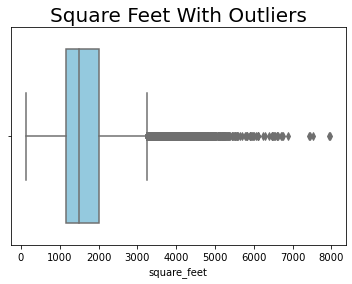

In [27]:
plt.title("Square Feet With Outliers", size=20, color='black')
sns.boxplot(df.square_feet, color='skyblue')

In [28]:
# Let's use IQR for the entire dataset
q1 = df.square_feet.quantile(.25)
q3 = df.square_feet.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

q1 = : 1170.0
q3 = : 2004.0
IQR = : 834.0
-------------------------------------
Upper Bound = : 4506.0
Lower Bound = : -1332.0


In [29]:
# lets give us everyhting less than the upper bound
df = df[df.square_feet < upper_bound]
# since lower bound is negative there is no need to include it
df.shape
# went from 62,132 rows to 59,554

(59554, 30)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Square Feet Without Outliers'}, xlabel='square_feet'>

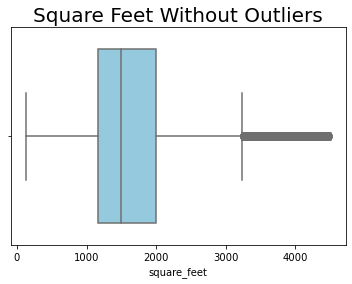

In [30]:
plt.title("Square Feet Without Outliers", size=20, color='black')
sns.boxplot(df.square_feet, color='skyblue')

In [31]:
df = df[df.square_feet < 4506.0]

# Handle Acres Outliers

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Acres With Outliers'}, xlabel='acres'>

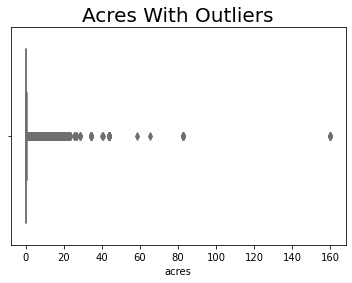

In [32]:
plt.title("Acres With Outliers", size=20, color='black')
sns.boxplot(df.acres, color='skyblue')

In [33]:
# Let's use IQR for the entire dataset
q1 = df.acres.quantile(.25)
q3 = df.acres.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

q1 = : 0.1322314049586777
q3 = : 0.265530303030303
IQR = : 0.13329889807162532
-------------------------------------
Upper Bound = : 0.665426997245179
Lower Bound = : -0.26766528925619826


In [34]:
df.acres.min()

0.0054178145087236

In [35]:
df.acres.max()

160.03236914600552

In [36]:
# lets give us everyhting less than the upper bound
df = df[df.acres < upper_bound]
# since lower bound is negative there is no need to include it
df.shape
# went from 59,554 rows to 51,207

(51207, 30)

In [37]:
df.acres.min()

0.0054178145087236

In [38]:
df.acres.max()

0.6654040404040404

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Acres Without Outliers'}, xlabel='acres'>

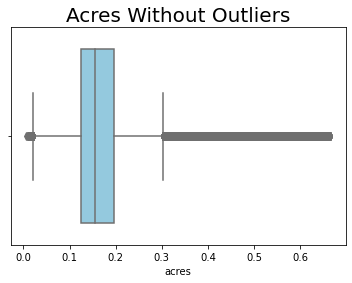

In [39]:
plt.title("Acres Without Outliers", size=20, color='black')
sns.boxplot(df.acres, color='skyblue')

In [40]:
df = df[df.acres < 0.665426997245179]

## Time to bin

In [41]:
# bin the square feet
df['square_feet_bins'] = pd.cut(df.square_feet, 
                        bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4600],
                        labels = [1, 2, 3, 4, 5, 6, 7, 8,9])
df['square_feet_bins'] = (df['square_feet_bins']).astype(int)

In [42]:
# bin lot square feet
df['lot_sqft_bins'] = pd.cut(df.lot_square_feet, 
                        bins = [0,10000,20000,30000,40000,50000,60000,70000,10000000],
                        labels = [0, 1, 2, 3, 4, 5, 6, 7])
df['lot_sqft_bins'] = (df['lot_sqft_bins']).astype(int)

<AxesSubplot:xlabel='acres', ylabel='Count'>

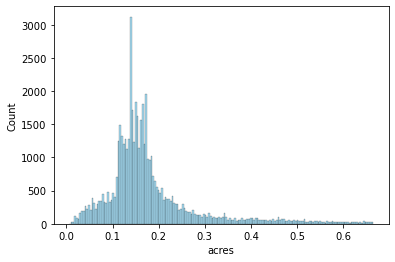

In [43]:
sns.histplot(data=df, x="acres", color='skyblue', ec='black')

In [44]:
df.acres.min()

0.0054178145087236

In [45]:
df.acres.max()

0.6654040404040404

In [46]:
# bin acres
df['acre_bins'] = pd.cut(df.acres, 
                        bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                        labels = [0, 1, 2, 3, 4, 5, 6])
df['acre_bins'] = (df['acre_bins']).astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51207 entries, 10711855 to 162960814
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   land_type            51207 non-null  float64 
 1   has_heating_system   51207 non-null  int64   
 2   bathrooms            51207 non-null  float64 
 3   bedrooms             51207 non-null  float64 
 4   quality              51207 non-null  float64 
 5   square_feet          51207 non-null  float64 
 6   fips                 51207 non-null  float64 
 7   has_fireplace        51207 non-null  float64 
 8   full_bathrooms       51207 non-null  float64 
 9   latitude             51207 non-null  float64 
 10  longitude            51207 non-null  float64 
 11  lot_square_feet      51207 non-null  float64 
 12  has_pool             51207 non-null  float64 
 13  city                 51207 non-null  float64 
 14  county               51207 non-null  float64 
 15  zip_code

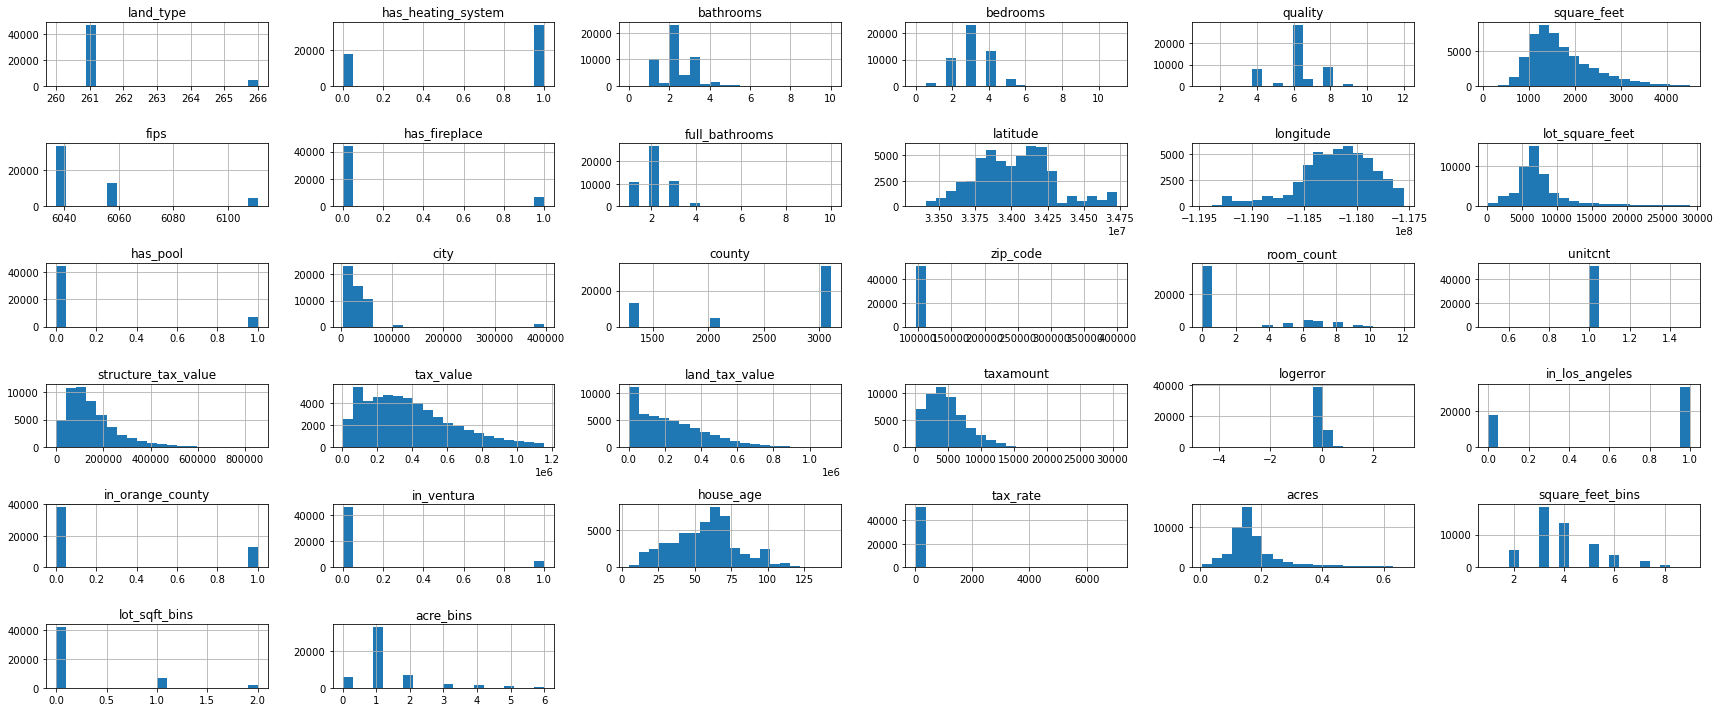

In [48]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [49]:
train, validate, test = wrangle.split_zillow(df)

In [50]:
train.head()

,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,latitude,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
parcelid,,,,,,,,,,,,,,,,,,,,,
11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,34024543.0,...,1,0,0,80.0,81.480056,0.151538,Accurate,4,0,1
12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,34174633.0,...,1,0,0,46.0,83.868458,0.301354,Accurate,5,1,3
10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,34157048.0,...,1,0,0,61.0,77.918010,0.219972,Accurate,5,0,2
10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,34145115.0,...,1,0,0,73.0,82.224030,0.153329,Accurate,4,0,1
13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,33887720.0,...,0,1,0,16.0,73.929172,0.104913,Accurate,6,0,1


In [51]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [52]:
X_train.head()

,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,latitude,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
parcelid,,,,,,,,,,,,,,,,,,,,,
11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,34024543.0,...,1,0,0,80.0,81.480056,0.151538,Accurate,4,0,1
12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,34174633.0,...,1,0,0,46.0,83.868458,0.301354,Accurate,5,1,3
10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,34157048.0,...,1,0,0,61.0,77.918010,0.219972,Accurate,5,0,2
10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,34145115.0,...,1,0,0,73.0,82.224030,0.153329,Accurate,4,0,1
13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,33887720.0,...,0,1,0,16.0,73.929172,0.104913,Accurate,6,0,1


In [53]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [54]:
train.head()

,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,latitude,...,in_los_angeles,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins
parcelid,,,,,,,,,,,,,,,,,,,,,
11724867,261.0,1,1.0,4.0,6.0,1570.0,6037.0,0.0,1.0,34024543.0,...,1,0,0,80.0,81.480056,0.151538,Accurate,4,0,1
12128007,261.0,1,2.0,3.0,8.0,2306.0,6037.0,0.0,2.0,34174633.0,...,1,0,0,46.0,83.868458,0.301354,Accurate,5,1,3
10757399,261.0,1,3.0,4.0,7.0,2309.0,6037.0,0.0,3.0,34157048.0,...,1,0,0,61.0,77.918010,0.219972,Accurate,5,0,2
10911485,261.0,1,3.0,3.0,8.0,1912.0,6037.0,0.0,3.0,34145115.0,...,1,0,0,73.0,82.224030,0.153329,Accurate,4,0,1
13903643,261.0,0,3.0,4.0,6.0,2539.0,6059.0,0.0,3.0,33887720.0,...,0,1,0,16.0,73.929172,0.104913,Accurate,6,0,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51207 entries, 10711855 to 162960814
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   land_type            51207 non-null  float64 
 1   has_heating_system   51207 non-null  int64   
 2   bathrooms            51207 non-null  float64 
 3   bedrooms             51207 non-null  float64 
 4   quality              51207 non-null  float64 
 5   square_feet          51207 non-null  float64 
 6   fips                 51207 non-null  float64 
 7   has_fireplace        51207 non-null  float64 
 8   full_bathrooms       51207 non-null  float64 
 9   latitude             51207 non-null  float64 
 10  longitude            51207 non-null  float64 
 11  lot_square_feet      51207 non-null  float64 
 12  has_pool             51207 non-null  float64 
 13  city                 51207 non-null  float64 
 14  county               51207 non-null  float64 
 15  zip_code

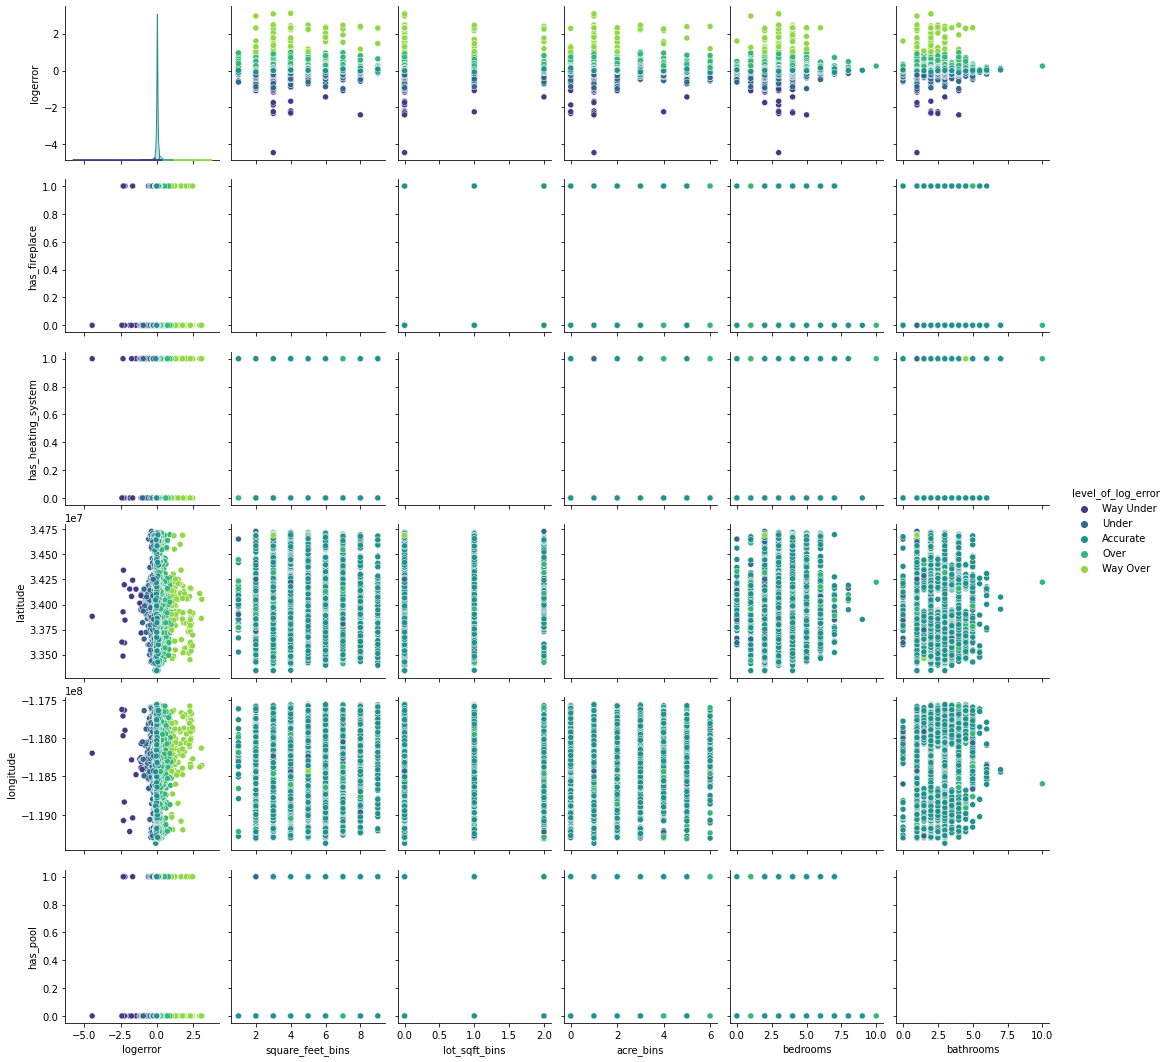

In [56]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 'acre_bins', 
                       'bedrooms', 'bathrooms'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 'latitude', 
                       'longitude', 'has_pool'], palette='viridis')

In [57]:
train.level_of_log_error.value_counts()

Accurate     26051
Over          1638
Under          873
Way Over        93
Way Under       20
Name: level_of_log_error, dtype: int64

'Way Under' = -4.656000000000001, -0.0331

'Under' =  -0.0331, -0.00366

'Accurate'= -0.00366, 0.0171

'Over' = 0.0171, 0.0496

'Way Over' = 0.0496, 5.263

In [58]:
train.acre_bins.value_counts()

1    18370
2     3981
0     3381
3     1306
4      902
5      490
6      245
Name: acre_bins, dtype: int64

In [59]:
train.square_feet_bins.value_counts()

3    10289
4     7529
5     3975
2     3041
6     2122
7     1053
8      455
9      154
1       57
Name: square_feet_bins, dtype: int64

In [ ]:
df.to_csv("clean_zillow.csv")